In [2]:
import pandas as pd

In [5]:
import datetime

In [6]:
from datetime import datetime

In [305]:
ratings = pd.read_csv('ratings.csv')

Хочу посмотреть в каком году активность пользователей была наибольшей

In [306]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [307]:
ratings.timestamp = ratings['timestamp'].agg([datetime.fromtimestamp])
                  
            
ratings.head()               

,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14 08:52:24
1,1,1029,3.0,2009-12-14 08:52:59
2,1,1061,3.0,2009-12-14 08:53:02
3,1,1129,2.0,2009-12-14 08:53:05
4,1,1172,4.0,2009-12-14 08:53:25


In [308]:
def year_ (timestamp):
    return timestamp.year

In [309]:
ratings['timestamp'] = ratings['timestamp'].apply(year_)

In [310]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,2009
1,1,1029,3.0,2009
2,1,1061,3.0,2009
3,1,1129,2.0,2009
4,1,1172,4.0,2009


In [311]:
ratings.rename(columns={'timestamp': 'year'},inplace=True)

In [312]:
ratings.head()

,userId,movieId,rating,year
0,1,31,2.5,2009
1,1,1029,3.0,2009
2,1,1061,3.0,2009
3,1,1129,2.0,2009
4,1,1172,4.0,2009


In [313]:
ratin_year = (ratings
              .groupby('year')
              .count()[['rating']]
              .sort_values('rating', ascending=False)
              .reset_index()
             )
ratin_year.head()

,year,rating
0,2000,13869
1,2006,7493
2,2005,7161
3,2015,6610
4,1996,6239


In [314]:
import matplotlib.pyplot as plt

<BarContainer object of 22 artists>

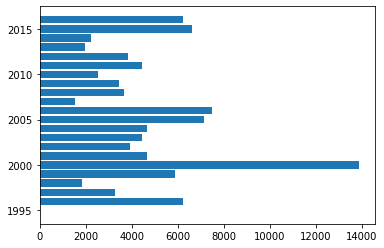

In [315]:
plt.barh(ratin_year['year'], ratin_year['rating'])

В 2000 году активность пользователей значительно выше.

Посмотрим сколько фильмом было выпущено в каждом году.

In [316]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [317]:
import re


In [318]:
# создаем регулярное выражение на проверку года
regex_year = '\(\d{4}\)'


In [319]:
# функция, которая из названия получит год, если год не указан проставит 1900
def production_year (title):
    t_year = title.split(' ')
    
    if re.findall(regex_year,t_year[-1]):
        return (t_year[-1])
    else:
        return ('(1900)')

In [320]:
movies['year'] = movies['title'].apply(production_year)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
4,5,Father of the Bride Part II (1995),Comedy,(1995)


In [321]:
def year_ (year):
    return (re.sub(r'(\()(\d{4})(\))',r'\2', year) )

In [324]:
movies['year'] = movies['year'].apply(year_)
#movies.head()
movies.tail()

,movieId,title,genres,year
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,2016
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,2016
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,2016
9123,164977,The Gay Desperado (1936),Comedy,1936
9124,164979,"Women of '69, Unboxed",Documentary,1900


In [325]:
movies_year = (movies
               .groupby('year')
               .count()
               .sort_values('movieId', ascending=False)
               .filter(items = ['year', 'movieId'])
               .reset_index()
              )
             
movies_year.head()

,year,movieId
0,1996,275
1,2000,273
2,1998,272
3,2002,272
4,1997,267


In [326]:
len(movies_year)

104

In [327]:
ratin_year.head()

,year,rating
0,2000,13869
1,2006,7493
2,2005,7161
3,2015,6610
4,1996,6239


In [328]:
len(ratin_year)

22

In [330]:
movies_yeas_rat = ratin_year.merge(movies_year, on= 'year', how= 'left')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [331]:
!pd.concat

/bin/sh: pd.concat: command not found


In [304]:
movies_year_ratin.head(20)

,rating,movieId
year,,
2000,13869,NaN
2006,7493,NaN
2005,7161,NaN
2015,6610,NaN
1996,6239,NaN
2016,6225,NaN
1999,5901,NaN
2001,4658,NaN
2004,4658,NaN
